In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import palettable
%matplotlib inline
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import FixedLocator

In [2]:
DATA_DIRECTOY = "/run/media/sebastian/shoerl_data/mode_choice_paper"

In [3]:
colors = palettable.tableau.Tableau_10.mpl_colors

In [4]:
runs = [
    "trip_constrained", "tour_constrained", "plan_constrained", "advanced_constrained",
    "trip_unconstrained", "tour_unconstrained", "plan_unconstrained", "advanced_unconstrained",
]

runtimes = {}

for run in runs:
    local_runtimes = []
    
    with open("%s/%s_stopwatch.txt" % (DATA_DIRECTOY, run)) as f:
        header = None
        skip = False
        
        for line in f:
            line = line.strip().split("\t")
            
            if header is None:
                header = line
                skip = True
            
            elif not skip:
                start_time = np.array(line[header.index("BEGIN replanning")].split(":"), dtype=np.float).dot([3600.0, 60.0, 1.0])
                end_time = np.array(line[header.index("END replanning")].split(":"), dtype=np.float).dot([3600.0, 60.0, 1.0])
                
                if end_time < start_time:
                    end_time += 24.0 * 3600.0
                
                local_runtimes.append(end_time - start_time)
                skip = False
            
            else:
                local_runtimes.append(0.0)
                skip = False
        
    runtimes[run] = local_runtimes

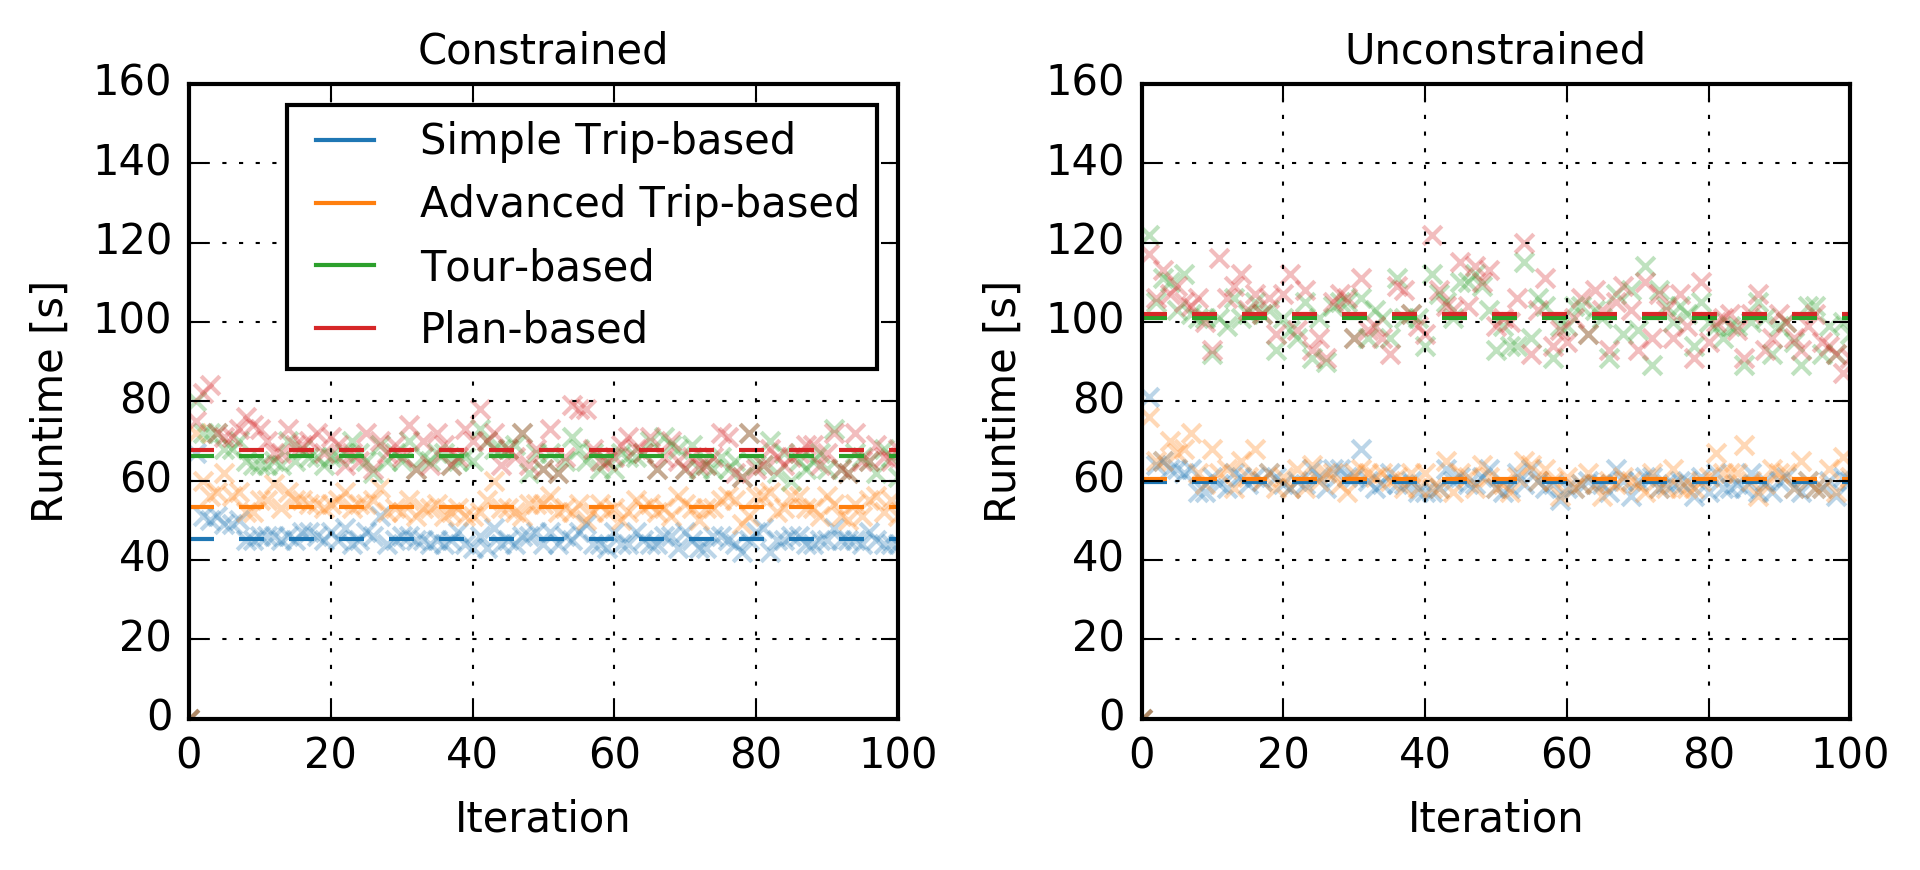

In [10]:
plt.figure(dpi = 300, figsize = (6.5, 3))

labels = [
    "Simple Trip-based", "Advanced Trip-based", "Tour-based", "Plan-based", "Advanced"
]

plt.subplot(1,2,1)

runs = [
    "trip_constrained", "advanced_constrained", "tour_constrained", "plan_constrained"
]

ylocs = [35.0, 35.0, 76.0, 76.0]
xlocs = [70.0, 90.0, 70.0, 90.0]

for j, (run, color, label, yloc, xloc) in enumerate(zip(runs, colors, labels, ylocs, xlocs)):
    times = runtimes[run]
    iterations = np.arange(len(times))
    plt.scatter(iterations, times, color = color, marker = "x", alpha = 0.3) #, linestyle = "none")
    
    total = 0.0
    count = 0.0
    
    for i in iterations:
        if i > 20 and i % 10 > 0:
            total += times[i]
            count += 1
    
    average = total / count
    
    plt.plot(iterations, np.ones((len(iterations),)) * average, color = color, linestyle = "--")
    plt.plot([], [], color = color, label = label)
    
    #plt.text(xloc, yloc, "%.2fs" % average, color = color, verticalalignment = "center", horizontalalignment = "center")

plt.ylabel("Runtime [s]")
plt.xlabel("Iteration")
plt.grid()
plt.legend(ncol = 1, loc = "best", fontsize = 10)
plt.ylim([0, 160])
plt.title("Constrained", fontsize = 10)
plt.xlim([0, 100])

plt.subplot(1,2,2)

runs = [
    "trip_unconstrained", "advanced_unconstrained", "tour_unconstrained", "plan_unconstrained"
]

ylocs = [50.0, 50.0, 110.0, 110.0]
xlocs = [70.0, 90.0, 70.0, 90.0]

for j, (run, color, label, yloc, xloc) in enumerate(zip(runs, colors, labels, ylocs, xlocs)):
    times = runtimes[run]
    iterations = np.arange(len(times))
    plt.scatter(iterations, times, color = color, marker = "x", alpha = 0.3) #, linestyle = "none")
    
    total = 0.0
    count = 0.0
    
    for i in iterations:
        if i > 20 and i % 10 > 0:
            total += times[i]
            count += 1
    
    average = total / count
    
    plt.plot(iterations, np.ones((len(iterations),)) * average, color = color, linestyle = "--")
    plt.plot([], [], color = color, label = label)

    #plt.text(xloc, yloc, "%.2fs" % average, color = color, verticalalignment = "center", horizontalalignment = "center")

plt.ylabel("Runtime [s]")
plt.xlabel("Iteration")
plt.grid()
plt.ylim([0, 160])
plt.title("Unconstrained", fontsize = 10)
plt.xlim([0, 100])

plt.tight_layout()

plt.savefig("plots/runtime.pdf")